<a href="https://colab.research.google.com/github/rahmawtnisa/Project-MachineLearning-DQLab/blob/main/Mini_Project_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mini Project Machine Learning
Pada project kali ini, akan terdapat 3 tahap yang akan kita lakukan, yaitu Data Preprocessing, Model Development, dan Pengayaan.

### 1. Data Preprocessing
Pada tahap Data Preprocessing, beberapa hal yang akan kita lakukan adalah sebagai berikut.

* Melakukan Encoding data kolom Label, 'profit' menjadi 1, 'loss' menjadi 0
* Melakukan Encoding data categorical, gunakan One Hot Encoding (Dummy Variable) untuk kolom yang memiliki kategori yang kurang dari 10, sedangkan kolom lain menggunakan teknik Label Encoding
* Transformasi nilai discount dengan menggunakan fungsi log1p dari numpy, dan tampilkan histogram hasilnya
* Memisahkan kolom variable dan target.
Melakukan train test split dengan ratio 0,75 dan 0,25 dan set random_state=0

### 2. Model Development
Pada tahap Model Development, kita akan melakukan :

* Bangun model Decision Tree (random state = 0) dengan menggunakan dataset training
* Prediksi pada dataset training dan testing dengan model DT yang dibangun
* Analisis performa prediksi pada data train dan test dengan melihat classification report dan nilai akurasi sebagai performance metric

### 3. Pengayaan
Sementara itu, pada bagian Pengayaan, kita akan :

* Membangun model dengan menggunakan algoritma Gradient Boosting (random state = 0), dan
* Menganalisis performa algoritma Gradient Boosting

(2955, 19) (2955,)
Data Training: X (2216, 19) Y (2216,)
Data Test: X (739, 19) Y (739,)
Akurasi Training 1.0
Akurasi Testing 0.8376184032476319
              precision    recall  f1-score   support

           0       0.61      0.60      0.61       154
           1       0.90      0.90      0.90       585

    accuracy                           0.84       739
   macro avg       0.75      0.75      0.75       739
weighted avg       0.84      0.84      0.84       739

Akurasi Training 0.9169675090252708
Akurasi Testing 0.8849797023004059
              precision    recall  f1-score   support

           0       0.78      0.63      0.70       154
           1       0.91      0.95      0.93       585

    accuracy                           0.88       739
   macro avg       0.84      0.79      0.81       739
weighted avg       0.88      0.88      0.88       739



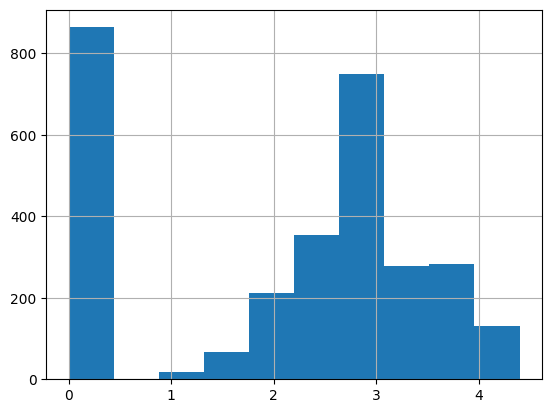

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load Data
dataset = 'https://storage.googleapis.com/dqlab-dataset/Data%20Mission.csv'
data_df = pd.read_csv(dataset)

#Lakukan Encoding data kolom Label, 'profit' menjadi 1, 'loss' menjadi 0
mapping = {"Profit": 1, 'Loss':0}
data_df['Label'] = data_df['Label'].map(mapping)

# Lakukan Encoding data categorical, gunakan One Hot Encoding (Dummy Variable) untuk kolom yang memiliki kategori yang kurang dari 10, sedangkan kolom lain menggunakan teknik Label Encoding
categori_banyak = [ 'Top Branch', 'Top Sub-Product', 'Top City', 'Month']
encoder = LabelEncoder()
X_labels = data_df[categori_banyak]
X_labels = X_labels.apply(encoder.fit_transform)

X_dummies = pd.get_dummies(data_df[['Region','Top Product', 'Top Cust Segment', 'Top Ship Mode']])

# Transformasi nilai discount dengan menggunakan fungsi log1p dari numpy, dan tampilkan histogram hasilnya
data_df['Discount'] = data_df.Discount.apply(np.log1p)
data_df.Discount.hist()

# Pisahkan antara kolom-kolom variable dan target.
X = pd.concat([X_labels, X_dummies, data_df['Discount']], axis= 1)
y = data_df["Label"]
print(X.shape, y.shape)

# Kemudian lakukan train test split dengan ratio 0,75 dan 0,25 dan set random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=0)
print('Data Training: X', X_train.shape, 'Y', y_train.shape)
print('Data Test: X', X_test.shape, 'Y', y_test.shape)

# Bangun model Decision Tree (random state = 0) dengan menggunakan dataset training
dt_mod = DecisionTreeClassifier(random_state = 0)
dt_mod.fit(X_train, y_train)

# Lakukan prediksi pada dataset training dan testing dengan model DT yang dibangun
y_pred_train = dt_mod.predict(X_train)

y_pred_test = dt_mod.predict(X_test)
# Analisis performa prediksi pada data train dan test dengan melihat classification report dan nilai akurasi sebagai performance metric
# Akurasi pada dataset training
acc_train = accuracy_score(y_train, y_pred_train)

# Akurasi pada dataset test
acc_test = accuracy_score(y_test, y_pred_test)

print('Akurasi Training', acc_train)
print('Akurasi Testing', acc_test)

print(classification_report(y_test, y_pred_test))

# Bangun model dengan menggunakan algoritma algoritma Gradient Boosting dengan random state = 0
gb_mod = GradientBoostingClassifier(random_state = 0)
gb_mod.fit(X_train, y_train)

# Analisis model Gradient Boosting
y_pred_train = gb_mod.predict(X_train)

y_pred_test = gb_mod.predict(X_test)

# Akurasi pada dataset training
acc_train = accuracy_score(y_train, y_pred_train)

# Akurasi pada dataset test
acc_test = accuracy_score(y_test, y_pred_test)

print('Akurasi Training', acc_train)
print('Akurasi Testing', acc_test)

print(classification_report(y_test, y_pred_test))